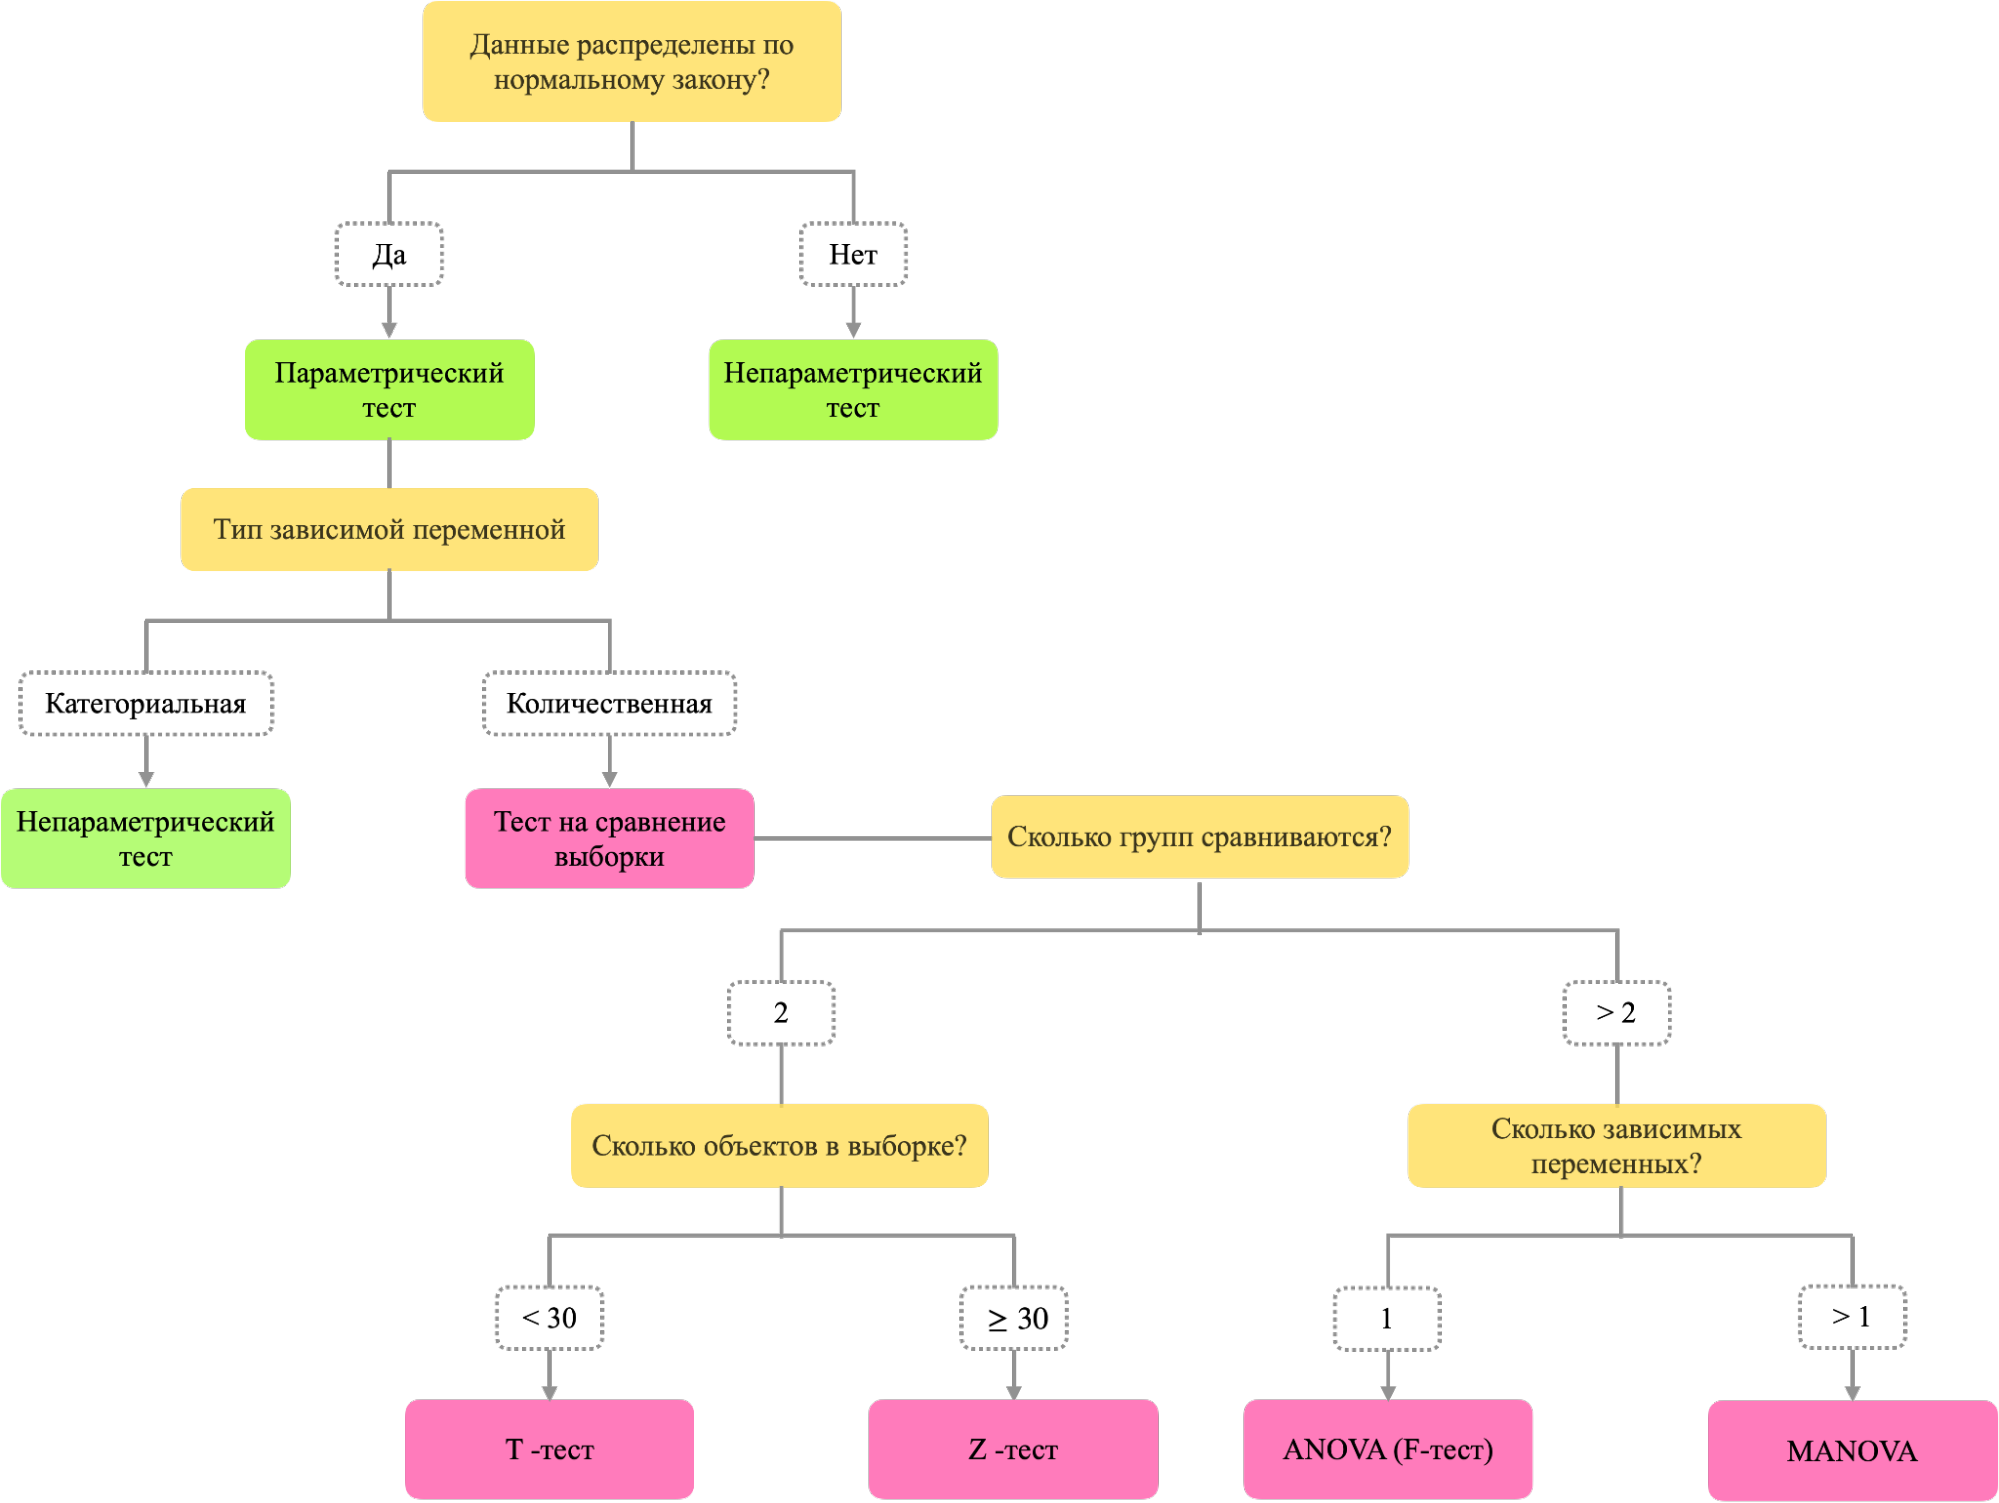

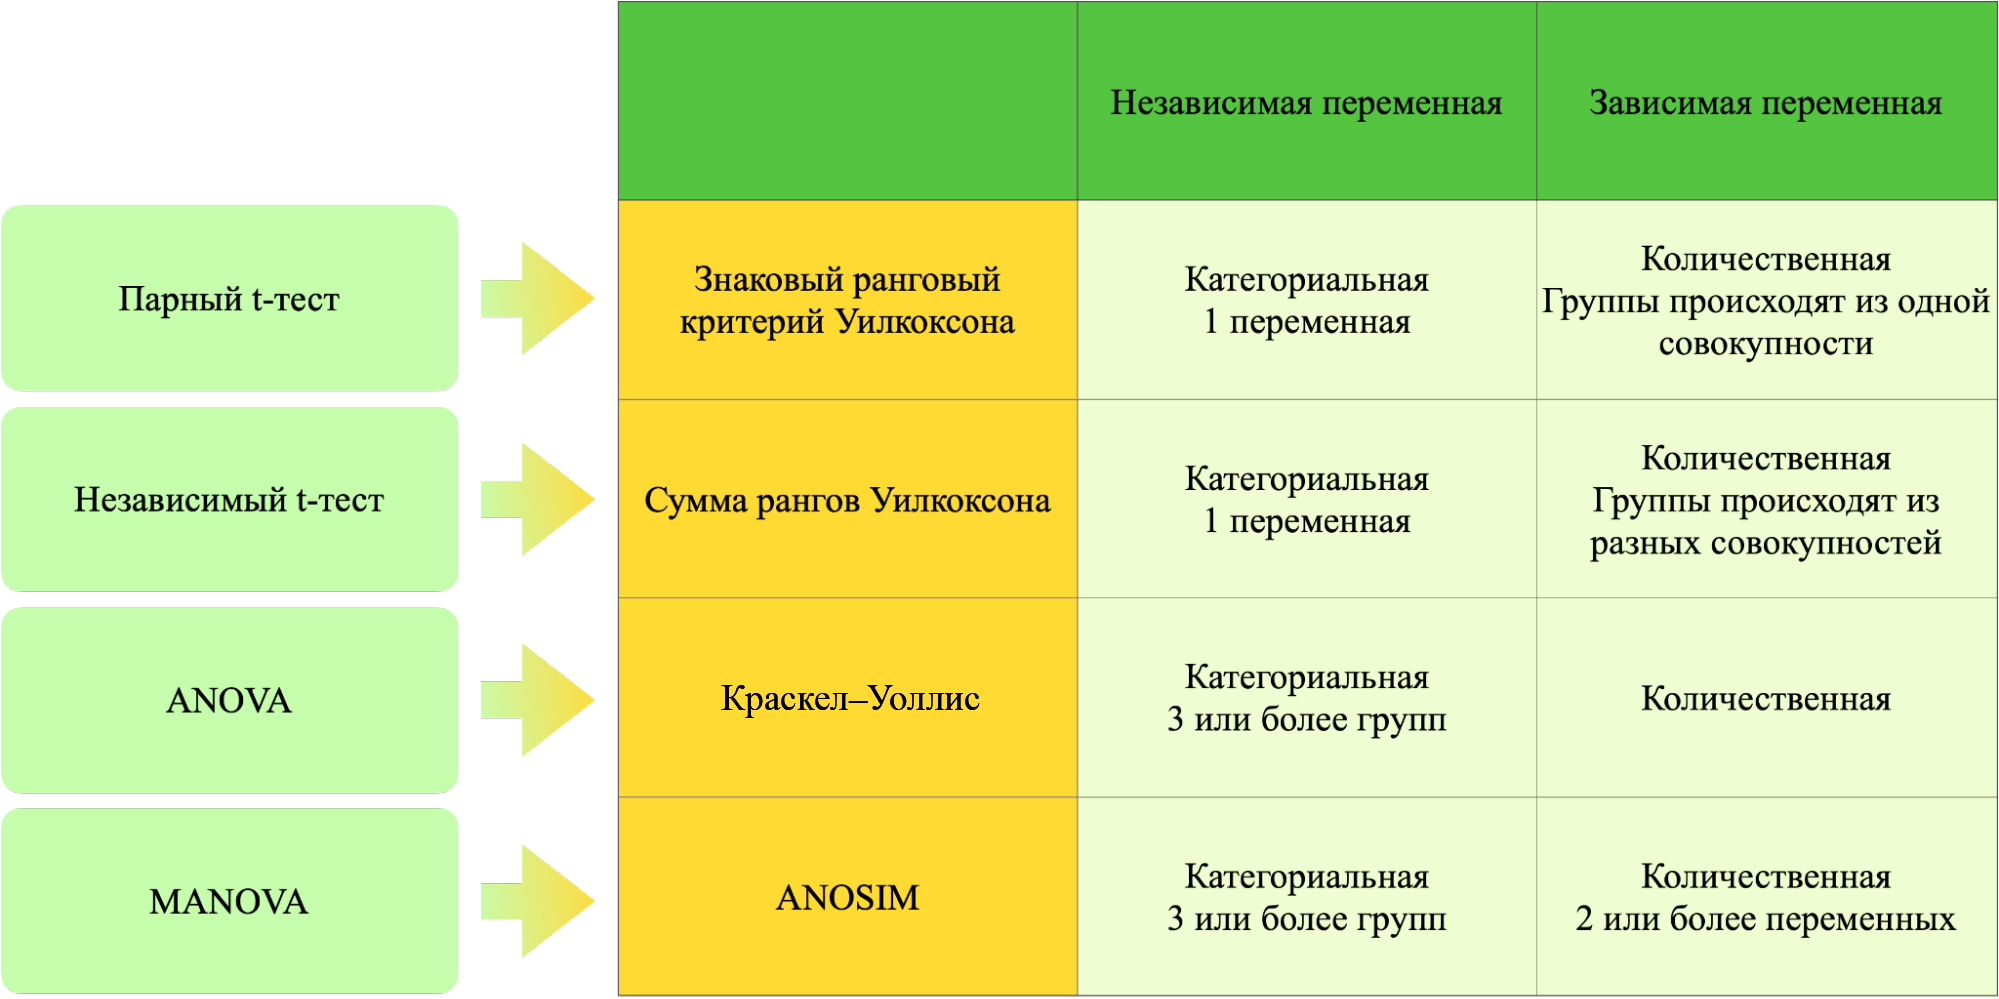

# Домашнее задание

Используя информацию по мидиям Петербурга и Магадана, которые представлены в виде двух массивов petersburg и magadan в разделе ANOVA тест, проверьте данные на нормальность и на наличие корреляции. Для этого объедините 2 массива в DataFrame. Обоснуйте выбор теста на корреляцию. Сделайте вывод по гипотезе.
 
 
Также ответьте на вопрос:
Какова разница в среднем размере мидии в зависимости от города-производителя. Обоснуйте выбор теста. Сделайте вывод по гипотезе.


In [2]:
import pandas as pd

In [34]:
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764,
           0.0689]
spb=pd.DataFrame(petersburg)
mag=pd.DataFrame(magadan)
frames=[spb,mag]

In [51]:
spb.columns=['spb_diam']
mag.columns=['mag_diam']

In [52]:
full_df=pd.concat(frames,axis=1)



In [53]:
full_df

,spb_diam,mag_diam
0,0.0974,0.1033
1,0.1352,0.0915
2,0.0817,0.0781
3,0.1016,0.0685
4,0.0968,0.0677
5,0.1064,0.0697
6,0.1050,0.0764
7,NaN,0.0689


Проверим данные на нормальность, установим альфа = 0.05 (дефолт), воспользуемся методом Шапиро-Уилка, так как он прекрасно работает на маленьких выборках

In [38]:
H0 = 'Данные распределены нормально'
Ha = 'Данные не распределены нормально (мы отвергаем H0)'
alpha=0.05

In [39]:
from scipy.stats import shapiro

In [40]:
_, p_spb = shapiro(spb)
_, p_mag = shapiro(mag)
print('p_spb=%.3f' % p_spb,'p_mag=%.3f' % p_mag)

# Интерпретация 

if p_spb > alpha:
	print(H0+'для мидий из СПБ')
else:
	print(Ha+'(для мидий из СПБ)')

if p_mag > alpha:
	print(H0+'для мидий из Магадана')
else:
	print(Ha+'(для мидий из Магадана)')

p_spb=0.242 p_mag=0.036
Данные распределены нормальнодля мидий из СПБ
Данные не распределены нормально (мы отвергаем H0)(для мидий из Магадана)


Получается, что диаметр мидий из Магадана, распределен ненормально, а мидий из СПБ - наоборот. Можно сделать вывод, что если считать, что данные распределены нормально тогда и только тогда, когда в каждом столбце нормальное распределение, то наши данные распределены ненормально! Однако давайте воспользуемся примером из модуля:

In [54]:
_, p = shapiro(full_df)
print('p=%.3f' % p)

# Интерпретация 

if p > alpha:
	print(H0)
else:
	print(Ha)

p=1.000
Данные распределены нормально


Возможно это связано с тем, что в таблице СПБ меньше индексов, поэтому при объединении присутствует Nan (либо потому что выборка игрушечная, то есть мало данных для серьезного анализа), этот вопрос уже поднимался в Пачке, я просто показываю оба варианта проверки на корреляцию и расчитываю на максимальный балл :)

# Независимый Т-тест

In [55]:
from scipy.stats import ttest_ind

In [56]:
H0 = 'Нет значимой разницы между диаметрами мидий в разных городах (СПБ,Магадан).'
Ha = 'Есть значимая разница между диаметрами мидий в разных городах(СПБ,Магадан).'

Зависимая переменная (диаметр мидии) является количественной. Группы происходят из разных совокупностей. Следовательно, мы используем независимый T-тест.

In [58]:
def t_test(df):
    print('\n' + "*** Результаты независимого T-теста ***")
    test_results = ttest_ind(full_df['spb_diam'],full_df['mag_diam'], equal_var=True)

    p = round(test_results[1],2)

    if p>alpha:
        print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу. {H0}")
    else:
        print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу. {Ha}")

t_test(full_df)


*** Результаты независимого T-теста ***
nan <= 0.05. Мы отвергаем нулевую гипотезу. Есть значимая разница между диаметрами сидий в разных городах(СПБ,Магадан).


# Ладно, уговорили, заполню этот Nan средним значением по питеру (можно было и 0, если честно, пример реально игрушечный и тут непонятно как заполнить лучше)

In [60]:
full_df=full_df.fillna(spb['spb_diam'].mean())
full_df

,spb_diam,mag_diam
0,0.097400,0.1033
1,0.135200,0.0915
2,0.081700,0.0781
3,0.101600,0.0685
4,0.096800,0.0677
5,0.106400,0.0697
6,0.105000,0.0764
7,0.103443,0.0689


In [61]:
def t_test(df):
    print('\n' + "*** Результаты независимого T-теста ***")
    test_results = ttest_ind(full_df['spb_diam'],full_df['mag_diam'], equal_var=True)

    p = round(test_results[1],2)

    if p>alpha:
        print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу. {H0}")
    else:
        print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу. {Ha}")

t_test(full_df)


*** Результаты независимого T-теста ***
0.0 <= 0.05. Мы отвергаем нулевую гипотезу. Есть значимая разница между диаметрами сидий в разных городах(СПБ,Магадан).


Видимо есть серьезная разница между городами, наша 0-ая гипотеза не оправдала себя.